By Group 5: 
* Adam Motaouakkil (260956145)
* Frédéric Mheir (260636214)
* Yann Bonzom (260969653)

# Instructions

In the last portion of this Notebook, we are using `matplotlib.pyplot.axline`. This, however, requires matplotlib to be updated.

Therefore, to run this notebook, we have to run it twice:


1.   We can run the first section of the Notebook: `Imports` (including `Matplotlib upgrade` section). This will update the runtime with the appropriate matplotlib version.
2. Optional: Comment-out the line `!pip install matplotlib --upgrade`. This will make the NoteBook result cleaner, as this line does not need to be used again, but is completely optional.
3. Click on `Runtime` -> `Restart and run all` (on `Google Colab`, similar steps for any IDE). This will restart the run time, and run the notebook. No error will be thrown.

Not following these instructions will throw an error at the last section (`ROC Curve`), because the `matplotlib.pyplot.axline` will only be available once matplotlib have been updated and the runtime restarted.

#Imports

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # For plotting
from IPython.core.debugger import set_trace # To debug

# For data loading
from scipy.io import arff #to load arff file
import urllib.request
import io # for io.StringIO()

# Simpler sklearn functions (like train_test_split) are allowed as per Ed Post #86 - https://edstem.org/us/courses/24117/discussion/1769799
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score # imports for the AUROC

## Matplotlib upgrade

In [ ]:
# The line below was necessary for our Google Colab to use the axline function,
# and is used in the ROC curve at the end of the notebook. 
# If an error is thrown at the last section (ROC curve), make sure this line
# is uncommented. It only needs to be ran once.
# Once this is ran successfully, the runtime has to be restarted (Runtime -> Restart and Run all)

!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Task 1

## Task 1.1 - Load data
For better ease of use, we directly load the datasets from the URL source. If, for whatever reason it doesn't work, we will load the files directly from the current directory (assuming `hepatitis.data` and `messidor.arff` are included in the current directory).

In [ ]:
# URLs to download the .csv and .arff files
hepatitis_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"
diabetic_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff"

hepatitis_dataset_path = "hepatitis.data"
diabetic_dataset_path = "messidor_features.arff"

# Load .csv as Panda DataFrame object
# First, try to load directly from the URL
# If it doesn't work, upload directly, assuming the file is in the same directory.
try:
  hepatitis = pd.read_csv(hepatitis_url, header=None)
except:
  hepatitis = pd.read_csv(hepatitis_dataset_path, header=None) # Hepatitis Dataset Panda DataFrame

# Add column names to the panda dataframe object
hepatitis.columns = [
    "CLASS",
    "AGE",
    "SEX",
    "STEROID",
    "ANTIVIRALS",
    "FATIGUE",
    "MALAISE",
    "ANOREXIA",
    "LIVER BIG",
    "LIVER FIRM",
    "SPLEEN PALPABLE",
    "SPIDERS",
    "ASCITES",
    "VARICES",
    "BILIRUBIN",
    "ALK PHOSPHATE",
    "SGOT",
    "ALBUMIN",
    "PROTIME",
    "HISTOLOGY"
]

# Load .arff and convert to panda DataFrame object
try:
  ftpstream = urllib.request.urlopen(diabetic_url)
  dataset_diabetic_arff = arff.loadarff(io.StringIO(ftpstream.read().decode('utf-8')))
except:
  dataset_diabetic_arff = arff.loadarff(diabetic_dataset_path)

diabetic = pd.DataFrame(dataset_diabetic_arff[0]) # Hepatitis Dataset Panda DataFrame

diabetic.columns = [
    "QUALITY",
    "PRE-SCANNING",
    "MA-1",
    "MA-2",
    "MA-3",
    "MA-4",
    "MA-5",
    "MA-6",
    "EXUDATE-1",
    "EXUDATE-2",
    "EXUDATE-3",
    "EXUDATE-4",
    "EXUDATE-5",
    "EXUDATE-6",
    "EXUDATE-7",
    "EXUDATE-8",
    "MACULA DISTANCE",
    "DIAMETER",
    "AM/FM",
    "CLASS"
]
print("-------------------------- Hepatitis (5 first) --------------------------")
print(hepatitis.head())
print("-------------------------- DIABETIC (5 first --------------------------")
#Diabetic

diabetic['CLASS'] = diabetic['CLASS'].str.decode('utf-8')

print(diabetic.head())

-------------------------- Hepatitis (5 first) --------------------------
   CLASS  AGE  SEX STEROID  ANTIVIRALS FATIGUE MALAISE ANOREXIA LIVER BIG  \
0      2   30    2       1           2       2       2        2         1   
1      2   50    1       1           2       1       2        2         1   
2      2   78    1       2           2       1       2        2         2   
3      2   31    1       ?           1       2       2        2         2   
4      2   34    1       2           2       2       2        2         2   

  LIVER FIRM SPLEEN PALPABLE SPIDERS ASCITES VARICES BILIRUBIN ALK PHOSPHATE  \
0          2               2       2       2       2      1.00            85   
1          2               2       2       2       2      0.90           135   
2          2               2       2       2       2      0.70            96   
3          2               2       2       2       2      0.70            46   
4          2               2       2       2       2      1.00 

## Task 1.2 - Clean the data

We noticed that there were incomplete data with '*?*' in the diabetic.

In [ ]:
print("Task 1.2 - results")
print("------------------")
# Eliminate rows with missing values
print("Hepatitis (dirty) lines: %i" %hepatitis.shape[0])
print("Hepatitis lines with missing values: %i" %hepatitis[hepatitis.eq('?').any(1)].shape[0])
hepatitis = hepatitis[~hepatitis.eq('?').any(1)]
print("Hepatitis (cleaned) lines: %i\n" %hepatitis.shape[0])

# print((diabetic.eq('?').any(1)).count())

print("Diabetic (dirty) lines: %i" %diabetic.shape[0])
print("Diabetic lines with missing values: %i" %diabetic[diabetic.eq('?').any(1)].shape[0])
diabetic = diabetic[~diabetic.eq('?').any(1)]
print("Diabetic (cleaned) lines: %i\n" %diabetic.shape[0])

Task 1.2 - results
------------------
Hepatitis (dirty) lines: 155
Hepatitis lines with missing values: 75
Hepatitis (cleaned) lines: 80

Diabetic (dirty) lines: 1151
Diabetic lines with missing values: 0
Diabetic (cleaned) lines: 1151



### Cleaned data result

*Hepatis* 
*   Contains 75 lines with missing values, identified with '*?*' value.
*   Cleaned data set input dimension: 80

*Diabetic* 
*   Contains 0 lines with missing values, identified with '*?*' value.
*   Cleaned data set input dimension: 1151

### Type conversion to numeric

*We will convert all numeric data to integers or floating points.*
*We also convert the type of CLASS column from {1,2} to {0,1}.*

In [ ]:
# We have to convert hepatitis columns to integers or float
hepatitis = hepatitis.apply(pd.to_numeric)
diabetic = diabetic.apply(pd.to_numeric)

# Convert hepatitis CLASS from 1=die, 2=live, to 0=die, 1=live
hepatitis['CLASS'] = hepatitis['CLASS']-1

diabetic["CLASS"] = diabetic["CLASS"].astype(int) # This column has type float -> let's convert it to integer, as the only possible values are 0 and 1.

## Task 1.3 - Basic Statistics

### Hepatitis Data Exploration

#### Basic statistics

In [ ]:
hepatitis_die = hepatitis[hepatitis.CLASS.eq(0)]
hepatitis_live = hepatitis[hepatitis.CLASS.eq(1)]
print("Number of 'hepatitis DIE': %i" %hepatitis_die.shape[0])
print("Number of 'hepatitis LIVE': %i" %hepatitis_live.shape[0])
print("_____________________________________________________________________\n")

print("\nHepatitis - DIE - Statistics:")
print(hepatitis_die.describe())

print("_____________________________________________________________________\n")

print("\nHepatitis - LIVE - Statistics:")
print(hepatitis_live.describe())

Number of 'hepatitis DIE': 13
Number of 'hepatitis LIVE': 67
_____________________________________________________________________


Hepatitis - DIE - Statistics:
       CLASS        AGE   SEX    STEROID  ANTIVIRALS    FATIGUE    MALAISE  \
count   13.0  13.000000  13.0  13.000000   13.000000  13.000000  13.000000   
mean     0.0  46.076923   1.0   1.384615    1.846154   1.153846   1.307692   
std      0.0   7.239493   0.0   0.506370    0.375534   0.375534   0.480384   
min      0.0  33.000000   1.0   1.000000    1.000000   1.000000   1.000000   
25%      0.0  42.000000   1.0   1.000000    2.000000   1.000000   1.000000   
50%      0.0  47.000000   1.0   1.000000    2.000000   1.000000   1.000000   
75%      0.0  49.000000   1.0   2.000000    2.000000   1.000000   2.000000   
max      0.0  59.000000   1.0   2.000000    2.000000   2.000000   2.000000   

       ANOREXIA  LIVER BIG  LIVER FIRM  SPLEEN PALPABLE    SPIDERS    ASCITES  \
count      13.0       13.0   13.000000        13.0000

#### Correlation
Correlation between features and LIVE/DIE

-------------------------------------------------
Correlation of each feature with the CLASS column
CLASS              1.000000
AGE               -0.212769
SEX                0.175876
STEROID            0.123830
ANTIVIRALS        -0.108776
FATIGUE            0.181151
MALAISE            0.275595
ANOREXIA          -0.185042
LIVER BIG         -0.194030
LIVER FIRM         0.055978
SPLEEN PALPABLE    0.135643
SPIDERS            0.287839
ASCITES            0.479211
VARICES            0.345785
BILIRUBIN         -0.351557
ALK PHOSPHATE     -0.189360
SGOT               0.078731
ALBUMIN            0.477404
PROTIME            0.395386
HISTOLOGY         -0.456856
Name: CLASS, dtype: float64
-------------------------------------------------


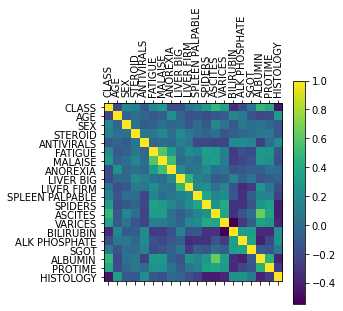

In [ ]:
# Calculate correlations between features
corr = hepatitis.corr()

hepatitis_corr = corr["CLASS"]
print("-------------------------------------------------")
print("Correlation of each feature with the CLASS column")
print(hepatitis_corr)
print("-------------------------------------------------")

plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.xticks(rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.savefig('hepatitis_corr.png',dpi=300,bbox_inches='tight')
plt.show()

#### Graph Distribution

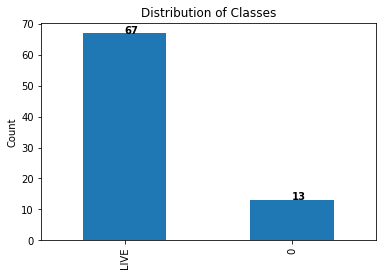

           CLASS       AGE        SEX    STEROID  ANTIVIRALS    FATIGUE  \
count  80.000000  80.00000  80.000000  80.000000   80.000000  80.000000   
mean    0.837500  40.66250   1.137500   1.525000    1.737500   1.350000   
std     0.371236  11.28003   0.346547   0.502525    0.442769   0.479979   
min     0.000000  20.00000   1.000000   1.000000    1.000000   1.000000   
25%     1.000000  32.00000   1.000000   1.000000    1.000000   1.000000   
50%     1.000000  38.50000   1.000000   2.000000    2.000000   1.000000   
75%     1.000000  49.25000   1.000000   2.000000    2.000000   2.000000   
max     1.000000  72.00000   2.000000   2.000000    2.000000   2.000000   

         MALAISE   ANOREXIA  LIVER BIG  LIVER FIRM  SPLEEN PALPABLE  \
count  80.000000  80.000000  80.000000   80.000000        80.000000   
mean    1.612500   1.850000   1.837500    1.525000         1.812500   
std     0.490253   0.359324   0.371236    0.502525         0.392775   
min     1.000000   1.000000   1.000000  

In [ ]:
# Graph distribution of DIE vs LIVE
hepatitis_plt = hepatitis.copy()
hepatitis_plt['CLASS'] = hepatitis['CLASS'].replace(0, 'DIE')
hepatitis_plt['CLASS'] = hepatitis['CLASS'].replace(1, 'LIVE')
hepatitis_plt['CLASS'].value_counts().plot(kind='bar')
# Show exact values on top of each bar
for i, v in enumerate(hepatitis_plt['CLASS'].value_counts()):
    plt.text(i, v, str(v), color='black', fontweight='bold')
plt.title('Distribution of Classes')
plt.ylabel('Count')
plt.show()

# Describe dataframe
print(hepatitis.describe())

### Diabetic Retinopathy Debrecen Data Exploration

#### Basic Statistics

In [ ]:
# Diabetic
diabetic_no_signs_of_dr = diabetic[diabetic.CLASS.eq("0")]
diabetic_contais_signs_of_dr = diabetic[diabetic.CLASS.eq("1")]
print("Number of 'signs of diabetic retinopathy': %i" %diabetic_no_signs_of_dr.shape[0])
print("Number of 'no signs of diabetic retinopathy': %i" %diabetic_contais_signs_of_dr.shape[0])

print(diabetic.describe())

Number of 'signs of diabetic retinopathy': 0
Number of 'no signs of diabetic retinopathy': 0
           QUALITY  PRE-SCANNING         MA-1         MA-2         MA-3  \
count  1151.000000   1151.000000  1151.000000  1151.000000  1151.000000   
mean      0.996525      0.918332    38.428323    36.909644    35.140747   
std       0.058874      0.273977    25.620913    24.105612    22.805400   
min       0.000000      0.000000     1.000000     1.000000     1.000000   
25%       1.000000      1.000000    16.000000    16.000000    15.000000   
50%       1.000000      1.000000    35.000000    35.000000    32.000000   
75%       1.000000      1.000000    55.000000    53.000000    51.000000   
max       1.000000      1.000000   151.000000   132.000000   120.000000   

              MA-4         MA-5         MA-6    EXUDATE-1    EXUDATE-2  \
count  1151.000000  1151.000000  1151.000000  1151.000000  1151.000000   
mean     32.297133    28.747176    21.151173    64.096674    23.088012   
std      

#### Correlation

-------------------------------------------------
Correlation of each feature with the CLASS column
QUALITY            0.062816
PRE-SCANNING      -0.076925
MA-1               0.292603
MA-2               0.266338
MA-3               0.234691
MA-4               0.197511
MA-5               0.161631
MA-6               0.127861
EXUDATE-1          0.058015
EXUDATE-2          0.000479
EXUDATE-3          0.038281
EXUDATE-4          0.104254
EXUDATE-5          0.142273
EXUDATE-6          0.151424
EXUDATE-7          0.184772
EXUDATE-8          0.177313
MACULA DISTANCE    0.008466
DIAMETER          -0.030868
AM/FM             -0.042144
CLASS              1.000000
Name: CLASS, dtype: float64
-------------------------------------------------


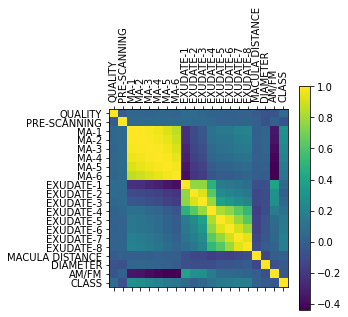

In [ ]:
# Calculate correlations between features
corr = diabetic.corr()

diabetic_corr = corr["CLASS"]
print("-------------------------------------------------")
print("Correlation of each feature with the CLASS column")
print(diabetic_corr)
print("-------------------------------------------------")

plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.xticks(rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.savefig('diabetic_corr.png',dpi=300,bbox_inches='tight')
plt.show()

#### Graph Distribution

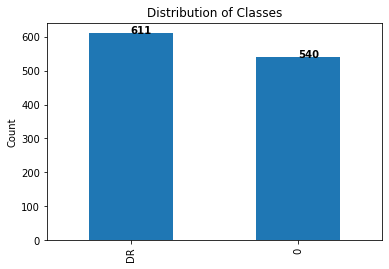

           QUALITY  PRE-SCANNING         MA-1         MA-2         MA-3  \
count  1151.000000   1151.000000  1151.000000  1151.000000  1151.000000   
mean      0.996525      0.918332    38.428323    36.909644    35.140747   
std       0.058874      0.273977    25.620913    24.105612    22.805400   
min       0.000000      0.000000     1.000000     1.000000     1.000000   
25%       1.000000      1.000000    16.000000    16.000000    15.000000   
50%       1.000000      1.000000    35.000000    35.000000    32.000000   
75%       1.000000      1.000000    55.000000    53.000000    51.000000   
max       1.000000      1.000000   151.000000   132.000000   120.000000   

              MA-4         MA-5         MA-6    EXUDATE-1    EXUDATE-2  \
count  1151.000000  1151.000000  1151.000000  1151.000000  1151.000000   
mean     32.297133    28.747176    21.151173    64.096674    23.088012   
std      21.114767    19.509227    15.101560    58.485289    21.602696   
min       1.000000     1.000

In [ ]:
# Graph distribution of DIE vs LIVE
diabetic_plt = diabetic.copy()
diabetic_plt['CLASS'] = diabetic['CLASS'].replace(0, 'NO DR')
diabetic_plt['CLASS'] = diabetic['CLASS'].replace(1, 'DR')
diabetic_plt['CLASS'].value_counts().plot(kind='bar')
# Show exact values on top of each bar
for i, v in enumerate(diabetic_plt['CLASS'].value_counts()):
    plt.text(i, v, str(v), color='black', fontweight='bold')
plt.title('Distribution of Classes')
plt.ylabel('Count')
plt.show()

# Describe dataframe
print(diabetic.describe())

# Task 2 - Implementing KNN & DT

##2.0 - KNN Implementation

**Reference**

The code for the basic KNN implementation is taken from class at the link below. Our extensions to it to improve model performance will be done in the experiments section below. We have added the evaluate_acc and weighted_predict functions at the end. 

Github reference link: https://github.com/yueliyl/comp551-notebooks/blob/master/KNN.ipynb

Colab reference link: https://colab.research.google.com/github/yueliyl/comp551-notebooks/blob/master/KNN.ipynb#scrollTo=16NqpdCiwHga

In [ ]:
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

class KNN:

    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return
    
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y) + 1
        return self
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        knns = np.zeros((num_test, self.K), dtype=int)
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        y_prob /= self.K
        return y_prob, knns

    def weighted_predict(self, x_test):
        num_test = x_test.shape[0]
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        knns = np.zeros((num_test, self.K), dtype=int)
        y_prob = np.zeros((num_test, self.C))
        result = []
        for i in range(num_test):
            class_list = [0, 0]
            # Get the nodes with the greatest distances compared to i.
            knns[i,:] = np.argsort(distances[i])[:self.K]
            # Get the total of the inverse weights and add the inverse weights
            prob_list = []
            total_similarity = 0
            # Iterate through the nearest neighbors and get the total inverse
            for k in range(len(knns[i])):
                # First, check if distance[i][k] == 0
                # If so, we are in the case where it reduces to normal, so = 1
                if (distances[i][knns[i][k]] == 0):
                  distances[i][knns[i][k]] = 1
                total_similarity += (distances[i][knns[i][k]])**-1
                prob_list.append((distances[i][knns[i][k]])**-1)
                #print(distances[i][knns[i][k]])
                #print(distances[i][knns[i][k]]**-1)
            # Check for class designation depends on weight.
            for j in range(len(knns[i])):
                prob_list[j] /= total_similarity # This gives P(y* = c | x*)
                if self.y[knns[i][j]] == 0:
                    class_list[0] += prob_list[j]
                else:
                    class_list[1] += prob_list[j]
            # Make a decision then and there.
            if class_list[0] >= class_list[1]:
                result.append(0)
            else:
                result.append(1)
        # Return the predictions and the knns for each point.
        return result, knns

    def evaluate_acc(self, y_true, y_pred):
        accuracy_score = np.sum(y_pred == y_true)/y_true.shape[0]
        return accuracy_score

##2.1 - Decision Tree Implementation

**Reference**

The code below is borrowed from the following github code: https://github.com/yueliyl/comp551-notebooks/blob/master/DecisionTree.ipynb
(Colab URL: https://colab.research.google.com/github/yueliyl/comp551-notebooks/blob/master/DecisionTree.ipynb).

**Note that we have made modifications to the code to tailor it to our datasets.**

Please note that this is allowed, as per the Assignment instructions, p.3: " *You are free to implement these models as you see fit, but you should follow the equations that are presented in the lecture slides, and you must implement the models from scratch (i.e., you CANNOT use SciKit Learn or any other pre-existing implementations of these methods). However, you are free to use relevant code given at the course GitHub https://github.com/yueliyl/comp551-notebooks.* "

In [ ]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

In [ ]:
def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices].flatten())
            right_cost = cost_fn(node.labels[right_indices].flatten())
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

In [ ]:
#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels)
    class_probs = counts / np.sum(counts)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log2(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

In [ ]:
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_gini_index, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        
    def fit(self, data, labels):
        self.data = data
        self.labels = labels
        if self.num_classes is None:
            self.num_classes = np.max(labels) + 1
        #below are initialization of the root of the decision tree
        self.root = Node(np.arange(data.shape[0]), None)
        self.root.data = data
        self.root.labels = labels
        self.root.num_classes = self.num_classes
        self.root.depth = 0
        #to recursively build the rest of the tree
        self._fit_tree(self.root)
        return self

    def _fit_tree(self, node):
        #This gives the condition for termination of the recursion resulting in a leaf node
        if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
            return
        #greedily select the best test by minimizing the cost
        cost, split_feature, split_value = greedy_test(node, self.cost_fn)
        #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
        if np.isinf(cost):
            return
        #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
        #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
        test = node.data[node.data_indices,split_feature] <= split_value
        #store the split feature and value of the node
        node.split_feature = split_feature
        node.split_value = split_value
        #define new nodes which are going to be the left and right child of the present node
        left = Node(node.data_indices[test], node)
        right = Node(node.data_indices[np.logical_not(test)], node)
        #recursive call to the _fit_tree()
        self._fit_tree(left)
        self._fit_tree(right)
        #assign the left and right child to present child
        node.left = left
        node.right = right

    
    def predict(self, data_test):
        class_probs = np.zeros((data_test.shape[0], self.num_classes))
        for n, x in enumerate(data_test):
            node = self.root
            #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
            while node.left:
                if x[node.split_feature] <= node.split_value:
                    node = node.left
                else:
                    node = node.right
            #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
            class_probs[n,:] = node.class_prob
        return class_probs

    def evaluate_acc(self, y_true, y_pred):
        # This function takes as input the true label and target labels, and
        # outputs the accuracy score.
        accuracy_score = np.sum(y_pred == y_true)/y_true.shape[0]
        return accuracy_score

# Task 3 - Running experiments

## Features and Labels Split from Dataset

Before we run the experiments on the KNN and Decision Tree, we must split the dataset in two:
* The features : X
    * `x_hepatitis`
    * `x_diabetic`
* The labels: y
    * `y_hepatitis`
    * `y_diabetic`

In [ ]:
# Extract the features and labels from the datasets
x_hepatitis, y_hepatitis = hepatitis.loc[:,'AGE':'HISTOLOGY'], hepatitis['CLASS']
x_diabetic, y_diabetic = diabetic.loc[:,'QUALITY':'AM/FM'], diabetic['CLASS']

## KNN

### Training and Testing Data Split + Conversion to Numpy


**Note:** we do this individually for KNN and then DT as we modify the data throughout our experiments, and need them to each be at the same starting point. 

* Here, we first split the X and y sets in Training and Testing sets.

* We will use 80% training, 20% testing, which is appropriate given the size of the datasets.

* We will also fix random_state = 1. This sets a seed and allow to reproduce the same split.

* We also convert the Pandas DataFrame to NumPy array, as our KNN and DT implementations require NumPy arrays. This can be done easily with the `to_numpy()` method.

In [ ]:
# Split data between X and y
x_hepatitis_train, x_hepatitis_test, y_hepatitis_train, y_hepatitis_test = train_test_split(x_hepatitis, y_hepatitis, test_size=0.2, random_state=1, shuffle=True)
x_diabetic_train, x_diabetic_test, y_diabetic_train, y_diabetic_test = train_test_split(x_diabetic, y_diabetic, test_size=0.2, random_state=1, shuffle=True)

# Convert Pandas DF to numpy -- this allow easier maths
x_hepatitis_train = x_hepatitis_train.to_numpy()
y_hepatitis_train = y_hepatitis_train.to_numpy()
x_hepatitis_test = x_hepatitis_test.to_numpy()
y_hepatitis_test = y_hepatitis_test.to_numpy()

x_diabetic_train = x_diabetic_train.to_numpy()
y_diabetic_train = y_diabetic_train.to_numpy()
x_diabetic_test = x_diabetic_test.to_numpy()
y_diabetic_test = y_diabetic_test.to_numpy()

### Hepatitis

#### KNN Results: Basic version

Here, we use the basic KNN on the **hepatitis** dataset, with no additional modifications/experiments.

In [ ]:
knn = KNN(K=3)
probs_test, _ = knn.fit(x_hepatitis_train, y_hepatitis_train).predict(x_hepatitis_test)
y_hepatitis_pred = np.argmax(probs_test, axis=-1)
accuracy = knn.evaluate_acc(y_hepatitis_test, y_hepatitis_pred)
print(f'accuracy is {accuracy*100:.1f}.')

accuracy is 56.2.


#### Experiment: KNN with hyperparameter K optimization

Here, we use the basic KNN, with the additional modifications:

* Testing with different K

----

We further split our training data into a smaller training set and a validation set. The validation set is used to test each iteration of the KNN model (with varying K), allowing us to pick the best K and fit the data to that. 

This final model is then run on the testing set to assess its true performance. 

**Notes:**


*   Oddly, the performance on the validation set is very high but very low on the testing set. Though we have found that, if you do this process of choosing K without a validation set and instead testing against the testing set directly for each K, you get K=9 which gives you a higher accuracy. 
*   Picking the lowest K that gives the best accuracy on the validation set makes the most sense – this helps the model run as fast as possible since we only need to consider that number of neighbours. 



best K = 4, test accuracy = 56.2


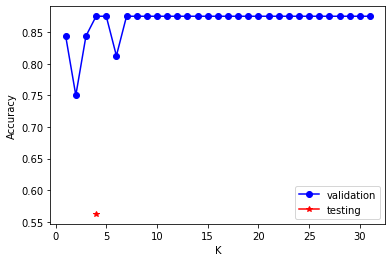

In [ ]:
x_hepatitis_train_tr, x_hepatitis_train_va, y_hepatitis_train_tr, y_hepatitis_train_va = train_test_split(x_hepatitis_train, y_hepatitis_train, test_size=0.5, random_state=1, shuffle=True)
model_choices=[]
valid_acc = []

n_valid = y_hepatitis_train_va.shape[0]

# Test for every possible K value (so, up to total number of datapoints)
for k in range(1,x_hepatitis_train_tr.shape[0]):
    knn = KNN(K=k)
    y_hepatitis_train_va_prob, _ = knn.fit(x_hepatitis_train_tr, y_hepatitis_train_tr).predict(x_hepatitis_train_va)
    y_hepatitis_train_va_pred = np.argmax(y_hepatitis_train_va_prob,axis=-1)
    accuracy = knn.evaluate_acc(y_hepatitis_train_va, y_hepatitis_train_va_pred)
    model_choices.append(k)
    valid_acc.append(accuracy)

best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_hepatitis_test_prob, _ = knn.fit(x_hepatitis_train, y_hepatitis_train).predict(x_hepatitis_test)
y_hepatitis_pred = np.argmax(y_hepatitis_test_prob, axis=-1)
accuracy = knn.evaluate_acc(y_hepatitis_test, y_hepatitis_pred)
print(f'best K = {best_valid_K}, test accuracy = {accuracy*100:.1f}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('hepatitis_KNN_chooseK.png',dpi=300,bbox_inches='tight')

#### Experiment: KNN with standardization of data
Here, we use the basic KNN, with the additional modifications:

* Standardization
* Testing with different K

----

We must ensure that the training and testing datasets are standardized individually, as else we'd have information leakage as the the model we're training with the training data would have some idea of the testing set's form (mean & standard deviation). 

Note that we use K=4, which is what our hyperparameter optimization returned as the optimal value. This, however, does not mean it's the best value, so we test different values of K. 

We get an accuracy of 100% upon standardization. So, standardization definitely helps (when looking at the data, it is clear that the scales vary enormously from one feature to another). However, this is absurdly high, potentially because of the very low amount of testing data (as the dataset is so small) as well as there only being 13 examples where the prediction is 1. 



In [ ]:
# Standardization
for d in range(x_hepatitis_train.shape[1]):
    x_hepatitis_train[:,d] = (x_hepatitis_train[:,d] - x_hepatitis_train[:,d].mean())/x_hepatitis_train[:,d].std()
    x_hepatitis_test[:,d] = (x_hepatitis_test[:,d] - x_hepatitis_test[:,d].mean())/x_hepatitis_test[:,d].std()

best K = 3, test accuracy = 100.0


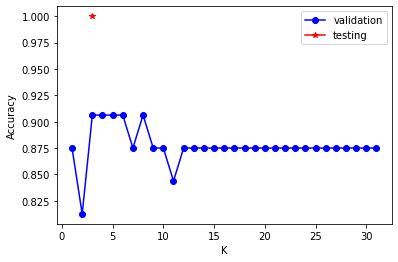

In [ ]:
x_hepatitis_train_tr, x_hepatitis_train_va, y_hepatitis_train_tr, y_hepatitis_train_va = train_test_split(x_hepatitis_train, y_hepatitis_train, test_size=0.5, random_state=1, shuffle=True)
model_choices=[]
valid_acc = []

n_valid = y_hepatitis_train_va.shape[0]

# Test for every possible K value (so, up to total number of datapoints)
for k in range(1,x_hepatitis_train_tr.shape[0]):
    knn = KNN(K=k)
    y_hepatitis_train_va_prob, _ = knn.fit(x_hepatitis_train_tr, y_hepatitis_train_tr).predict(x_hepatitis_train_va)
    y_hepatitis_train_va_pred = np.argmax(y_hepatitis_train_va_prob,axis=-1)
    accuracy = knn.evaluate_acc(y_hepatitis_train_va, y_hepatitis_train_va_pred)
    model_choices.append(k)
    valid_acc.append(accuracy)

best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_hepatitis_test_prob, _ = knn.fit(x_hepatitis_train, y_hepatitis_train).predict(x_hepatitis_test)
y_hepatitis_pred = np.argmax(y_hepatitis_test_prob, axis=-1)
accuracy = knn.evaluate_acc(y_hepatitis_test, y_hepatitis_pred)
print(f'best K = {best_valid_K}, test accuracy = {accuracy*100:.1f}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('hepatitis_KNN_chooseK.png',dpi=300,bbox_inches='tight')

#### Experiment: KNN with different distance function

Here, we use the basic KNN, with the additional modifications:

* Standardization
* Testing with different K

We will test the following distance functions:

* Euclidean
* Manhattan

##### Euclidean Distance
*Note that this is the same as `Experiment: KNN with standardization of data`, as euclidean distance is used by default.*

best K = 3, test accuracy = 100.0


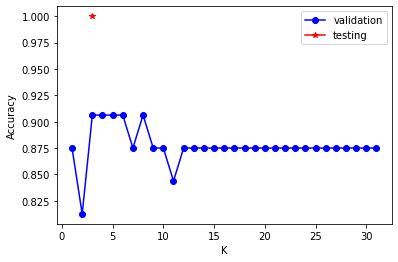

In [ ]:
# At this point, the data is already standardized.

x_hepatitis_train_tr, x_hepatitis_train_va, y_hepatitis_train_tr, y_hepatitis_train_va = train_test_split(x_hepatitis_train, y_hepatitis_train, test_size=0.5, random_state=1, shuffle=True)
model_choices=[]
valid_acc = []

n_valid = y_hepatitis_train_va.shape[0]

# Test for every possible K value (so, up to total number of datapoints)
for k in range(1,x_hepatitis_train_tr.shape[0]):
    knn = KNN(K=k, dist_fn= euclidean)
    y_hepatitis_train_va_prob, _ = knn.fit(x_hepatitis_train_tr, y_hepatitis_train_tr).predict(x_hepatitis_train_va)
    y_hepatitis_train_va_pred = np.argmax(y_hepatitis_train_va_prob,axis=-1)
    accuracy = knn.evaluate_acc(y_hepatitis_train_va, y_hepatitis_train_va_pred)
    model_choices.append(k)
    valid_acc.append(accuracy)

best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K, dist_fn= euclidean)
y_hepatitis_test_prob, _ = knn.fit(x_hepatitis_train, y_hepatitis_train).predict(x_hepatitis_test)
y_hepatitis_pred = np.argmax(y_hepatitis_test_prob, axis=-1)
accuracy = knn.evaluate_acc(y_hepatitis_test, y_hepatitis_pred)
print(f'best K = {best_valid_K}, test accuracy = {accuracy*100:.1f}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('hepatitis_KNN_chooseK.png',dpi=300,bbox_inches='tight')

##### Manhattan Distance



best K = 4, test accuracy = 93.8


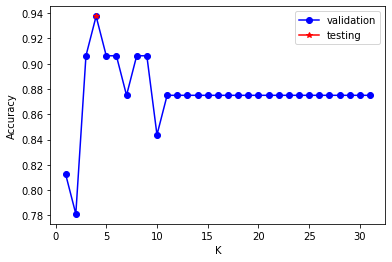

In [ ]:
# At this point, the data is already standardized.

x_hepatitis_train_tr, x_hepatitis_train_va, y_hepatitis_train_tr, y_hepatitis_train_va = train_test_split(x_hepatitis_train, y_hepatitis_train, test_size=0.5, random_state=1, shuffle=True)
model_choices=[]
valid_acc = []

n_valid = y_hepatitis_train_va.shape[0]

# Test for every possible K value (so, up to total number of datapoints)
for k in range(1,x_hepatitis_train_tr.shape[0]):
    knn = KNN(K=k, dist_fn = manhattan)
    y_hepatitis_train_va_prob, _ = knn.fit(x_hepatitis_train_tr, y_hepatitis_train_tr).predict(x_hepatitis_train_va)
    y_hepatitis_train_va_pred = np.argmax(y_hepatitis_train_va_prob,axis=-1)
    accuracy = knn.evaluate_acc(y_hepatitis_train_va, y_hepatitis_train_va_pred)
    model_choices.append(k)
    valid_acc.append(accuracy)

best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K, dist_fn = manhattan)
y_hepatitis_test_prob, _ = knn.fit(x_hepatitis_train, y_hepatitis_train).predict(x_hepatitis_test)
y_hepatitis_pred = np.argmax(y_hepatitis_test_prob, axis=-1)
accuracy = knn.evaluate_acc(y_hepatitis_test, y_hepatitis_pred)
print(f'best K = {best_valid_K}, test accuracy = {accuracy*100:.1f}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('hepatitis_KNN_chooseK.png',dpi=300,bbox_inches='tight')

As we can see, the Euclidean distance provides better accuracy; therefore we will continue to use it in our experiments.

####Experiment: Weighted KNN

Here, we use the basic KNN, with the additional modifications:

* Standardization
* Testing with different K
* Weights

----
**Explanations**:

Weight the KNN's through the inverse Euclidean distance entails two parts.

First, we compute the regular Euclidean distances and come up with the KNN's. Then we apply the inverse of the distances values and add them up to a sum total. Then, we divide each inverse by the total.

Secondly, we assign each inverse distance a class and add common classes together. In our case, we add them to a list in either index 0 or 1 indicating their class. The greatest value determines the prediction.

There is not significant change to the standardized version as the standardization implies a certain weight being distributed. The scale of numbers are not as significant so larger differences become smaller differences.

However, the model performs worse on un-standardized data, with a dip in performance at K=2.

best K = 3, test accuracy = 100.0


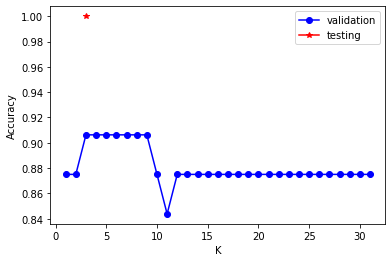

In [ ]:
x_hepatitis_train_tr, x_hepatitis_train_va, y_hepatitis_train_tr, y_hepatitis_train_va = train_test_split(x_hepatitis_train, y_hepatitis_train, test_size=0.5, random_state=1, shuffle=True)
model_choices=[]
valid_acc = []

n_valid = y_hepatitis_train_va.shape[0]

# Test for every possible K value (so, up to total number of datapoints)
for k in range(1,x_hepatitis_train_tr.shape[0]):
    knn = KNN(K=k)
    y_hepatitis_train_va_pred, _ = knn.fit(x_hepatitis_train_tr, y_hepatitis_train_tr).weighted_predict(x_hepatitis_train_va)
    accuracy = knn.evaluate_acc(y_hepatitis_train_va, y_hepatitis_train_va_pred)
    model_choices.append(k)
    valid_acc.append(accuracy)

best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_hepatitis_pred, _ = knn.fit(x_hepatitis_train, y_hepatitis_train).weighted_predict(x_hepatitis_test)
accuracy = knn.evaluate_acc(y_hepatitis_test, y_hepatitis_pred)
print(f'best K = {best_valid_K}, test accuracy = {accuracy*100:.1f}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('hepatitis_KNN_chooseK.png',dpi=300,bbox_inches='tight')

#### Experiment: High correlation features KNN

Here, we use the basic KNN, with the additional modifications:

* Standardization
* Testing with different K
* Only keeping high correlation features with the CLASS column

Explanations:

In task 1.3, we noticed that some features had a much larger correlation with the label column CLASS. More specifically, two features have a absolute correlation greater than 0.4:

ASCITES: 0.479
ALBUMIN: 0.477
Therefore, we experimented running our decision tree algorithm on a modified data set that contains only those two features.

best K = 5, test accuracy = 87.5


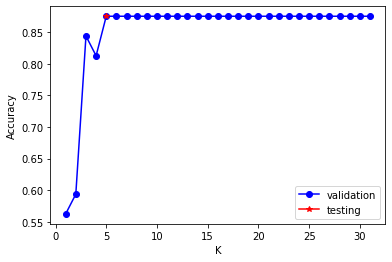

In [ ]:
# Create a modified hepatitis dataset containing only features with the highest
# correlation with the `CLASS` column (ASCITES, ALBUMIN).
x_hepatitis_mod = x_hepatitis.loc[:,["ASCITES","ALBUMIN"]]

# Training and testing data split from this modified data set.
x_hepatitis_train, x_hepatitis_test, y_hepatitis_train, y_hepatitis_test = train_test_split(x_hepatitis_mod, y_hepatitis, test_size=0.2, random_state=1, shuffle=True)

# Convert Pandas DF to numpy -- this allow easier maths
x_hepatitis_train = x_hepatitis_train.to_numpy()
y_hepatitis_train = y_hepatitis_train.to_numpy()
x_hepatitis_test = x_hepatitis_test.to_numpy()
y_hepatitis_test = y_hepatitis_test.to_numpy()

# Standardization
for d in range(x_hepatitis_train.shape[1]):
    x_hepatitis_train[:,d] = (x_hepatitis_train[:,d] - x_hepatitis_train[:,d].mean())/x_hepatitis_train[:,d].std()
    x_hepatitis_test[:,d] = (x_hepatitis_test[:,d] - x_hepatitis_test[:,d].mean())/x_hepatitis_test[:,d].std()

# Data Split
x_hepatitis_train_tr, x_hepatitis_train_va, y_hepatitis_train_tr, y_hepatitis_train_va = train_test_split(x_hepatitis_train, y_hepatitis_train, test_size=0.5, random_state=1, shuffle=True)
model_choices=[]
valid_acc = []

n_valid = y_hepatitis_train_va.shape[0]

# Test for every possible K value (so, up to total number of datapoints)
for k in range(1,x_hepatitis_train_tr.shape[0]):
    knn = KNN(K=k)
    y_hepatitis_train_va_prob, _ = knn.fit(x_hepatitis_train_tr, y_hepatitis_train_tr).predict(x_hepatitis_train_va)
    y_hepatitis_train_va_pred = np.argmax(y_hepatitis_train_va_prob,axis=-1)
    accuracy = knn.evaluate_acc(y_hepatitis_train_va, y_hepatitis_train_va_pred)
    model_choices.append(k)
    valid_acc.append(accuracy)

best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_hepatitis_test_prob, _ = knn.fit(x_hepatitis_train, y_hepatitis_train).predict(x_hepatitis_test)
y_hepatitis_pred = np.argmax(y_hepatitis_test_prob, axis=-1)
accuracy = knn.evaluate_acc(y_hepatitis_test, y_hepatitis_pred)
print(f'best K = {best_valid_K}, test accuracy = {accuracy*100:.1f}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('hepatitis_KNN_chooseK.png',dpi=300,bbox_inches='tight')

#### Decision Boundaries

Let's plot our decision boundaries using the two features with the highest correlation with the CLASS column: ASCITES and ALBUMIN.

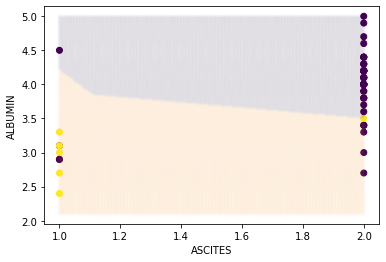

In [ ]:
# Create a modified hepatitis dataset containing only features with the highest
# correlation with the `CLASS` column (ASCITES, ALBUMIN).

x_hepatitis_mod = x_hepatitis.copy().loc[:,["ASCITES","ALBUMIN"]]

x_hepatitis_mod = x_hepatitis_mod.to_numpy()
y_hepatitis_mod = y_hepatitis.copy().to_numpy()

(N,D), C = x_hepatitis_mod.shape, np.max(y_hepatitis_mod)+1

# Training and testing data split from this modified data set.
x_hepatitis_train, x_hepatitis_test, y_hepatitis_train, y_hepatitis_test = train_test_split(x_hepatitis_mod, y_hepatitis_mod, test_size=0.2, random_state=1, shuffle=True)

# Decision boundaries
#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(x_hepatitis_mod[:,0]), np.max(x_hepatitis_mod[:,0]), 200)
x1v = np.linspace(np.min(x_hepatitis_mod[:,1]), np.max(x_hepatitis_mod[:,1]), 200)

# to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

for k in range(1, x_hepatitis_train.shape[0]):
    # print(k)
    model = KNN(K=k)

    y_train_prob = np.zeros((y_hepatitis_train.shape[0], C))
    y_train_prob[np.arange(y_hepatitis_train.shape[0]), y_hepatitis_train] = 1
    
    y_prob, knns = model.fit(x_hepatitis_train, y_hepatitis_train).predict(x_hepatitis_test)
    y_pred = np.argmax(y_prob,axis=-1)    
    correct = y_hepatitis_test == y_pred
    incorrect = np.logical_not(correct)    
    
    y_pred = np.argmax(y_prob,axis=-1)
    accuracy = np.sum(y_pred == y_hepatitis_test)/y_hepatitis_test.shape[0]
    acc = f'accuracy: {accuracy*100:.1f}.'
    

    #to get class probability of all the points in the 2D grid
    y_prob_all, _ = model.fit(x_hepatitis_train, y_hepatitis_train).predict(x_all)

    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1    


plt.scatter(x_hepatitis_train[:,0], x_hepatitis_train[:,1], c=y_train_prob[:, 0:1], marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all[:, 0:1], marker='.', alpha=.01)
plt.ylabel('ALBUMIN')
plt.xlabel('ASCITES')
plt.show()

We immediately notice that ASCITES is a discrete feature, while ALBUMIN is a continuous feature.
Therefore, a decision boudaris graph might not tell us much.

To fix this, we will look at the two highest CONTINUOUS features: ALBUMIN and PROTIME.
Let's plot the decision boundaries graph below:

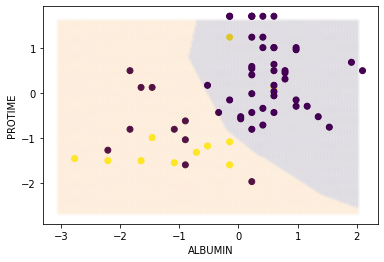

In [ ]:
# For the 2 biggest CONTINUOUS features: ALBUMIN and PROTIME

# Create a modified hepatitis dataset containing only features with the highest
# correlation with the `CLASS` column (ASCITES, ALBUMIN).

x_hepatitis_mod = x_hepatitis.copy().loc[:,["ALBUMIN","PROTIME"]]

x_hepatitis_mod = x_hepatitis_mod.to_numpy()
y_hepatitis_mod = y_hepatitis.copy().to_numpy()

# Standardized - For plotting
# We have to standardize the total input - this is what we will use for plotting.
# We want all points to range in the graph
x_hepatitis_mod_std = x_hepatitis_mod.copy()
for d in range(x_hepatitis_mod.shape[1]):
    x_hepatitis_mod_std[:,d] = (x_hepatitis_mod_std[:,d] - x_hepatitis_mod_std[:,d].mean())/x_hepatitis_mod_std[:,d].std()

(N,D), C = x_hepatitis_mod.shape, np.max(y_hepatitis_mod)+1

# Training and testing data split from this modified data set.
x_hepatitis_train, x_hepatitis_test, y_hepatitis_train, y_hepatitis_test = train_test_split(x_hepatitis_mod, y_hepatitis_mod, test_size=0.2, random_state=1, shuffle=True)

# # Standardization - x_train and x_test
# Here is the standardization of x_train and x_test used in testing
for d in range(x_hepatitis_train.shape[1]):
    x_hepatitis_train[:,d] = (x_hepatitis_train[:,d] - x_hepatitis_train[:,d].mean())/x_hepatitis_train[:,d].std()
    x_hepatitis_test[:,d] = (x_hepatitis_test[:,d] - x_hepatitis_test[:,d].mean())/x_hepatitis_test[:,d].std()

# Decision boundaries
#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(x_hepatitis_mod_std[:,0]), np.max(x_hepatitis_mod_std[:,0]), 200)
x1v = np.linspace(np.min(x_hepatitis_mod_std[:,1]), np.max(x_hepatitis_mod_std[:,1]), 200)

# to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

for k in range(1, x_hepatitis_train.shape[0]):
    model = KNN(K=k)

    y_train_prob = np.zeros((y_hepatitis_train.shape[0], C))
    y_train_prob[np.arange(y_hepatitis_train.shape[0]), y_hepatitis_train] = 1
    
    y_prob, knns = model.fit(x_hepatitis_train, y_hepatitis_train).predict(x_hepatitis_test)
    y_pred = np.argmax(y_prob,axis=-1)    
    correct = y_hepatitis_test == y_pred
    incorrect = np.logical_not(correct)    
    
    y_pred = np.argmax(y_prob,axis=-1)
    accuracy = np.sum(y_pred == y_hepatitis_test)/y_hepatitis_test.shape[0]
    acc = f'accuracy: {accuracy*100:.1f}.'
    

    #to get class probability of all the points in the 2D grid
    y_prob_all, _ = model.fit(x_hepatitis_train, y_hepatitis_train).predict(x_all)

    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1    


plt.scatter(x_hepatitis_train[:,0], x_hepatitis_train[:,1], c=y_train_prob[:, 0:1], marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all[:, 0:1], marker='.', alpha=.01)
plt.ylabel('PROTIME')
plt.xlabel('ALBUMIN')
plt.show()

As we can see, the graph is much clearer.
We had to standardize the data first, though, because the scale of the two features is not quite the same, which will distort the analysis.

### Diabetic Retinopathy Debrecen

#### KNN Results: Basic version

Here, we use the basic KNN on the **diabetic** dataset, with no additional modifications/experiments.

In [ ]:
knn = KNN(K=3)
probs_test, _ = knn.fit(x_diabetic_train, y_diabetic_train).predict(x_diabetic_test)
y_diabetic_pred = np.argmax(probs_test, axis=-1)
accuracy = knn.evaluate_acc(y_diabetic_test, y_diabetic_pred)
print(f'accuracy is {accuracy*100:.1f}.')

accuracy is 58.0.


#### Experiment: KNN with hyperparameter K optimization

We further split our training data into a smaller training set and a validation set. The validation set is used to test each iteration of the KNN model (with varying K), allowing us to pick the best K and fit the data to that. 

This final model is then run on the testing set to assess its true performance. 

**Notes:**


*   From the graph, we can see that the performance on the testing set is actually pretty similar to what we get on the validation sets while trying different values for K. Clearly, the larger amount of data in this dataset (compared to the heptatis dataset) allows us to train the model more accurately. 
*   We can see from the graph that, past a certain point, increasing K actually diminishes model performance. This is likely due to increasing overfitting, where using a lower amount allows our model to generalize better to new testing data. 
*   Model performance increased from 58 to 65.8%, which is good. 

best K = 13, test accuracy = 65.8


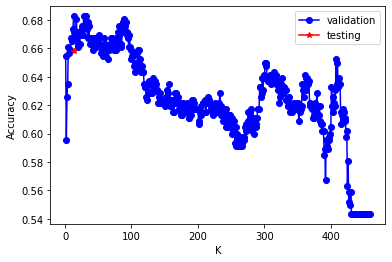

In [ ]:
x_diabetic_train_tr, x_diabetic_train_va, y_diabetic_train_tr, y_diabetic_train_va = train_test_split(x_diabetic_train, y_diabetic_train, test_size=0.5, random_state=1, shuffle=True)
model_choices=[]
valid_acc = []

n_valid = y_diabetic_train_va.shape[0]

# Test for every possible K value (so, up to total number of datapoints)
for k in range(1,x_diabetic_train_tr.shape[0]):
    knn = KNN(K=k)
    y_diabetic_train_va_prob, _ = knn.fit(x_diabetic_train_tr, y_diabetic_train_tr).predict(x_diabetic_train_va)
    y_diabetic_train_va_pred = np.argmax(y_diabetic_train_va_prob,axis=-1)
    accuracy = knn.evaluate_acc(y_diabetic_train_va, y_diabetic_train_va_pred)
    model_choices.append(k)
    valid_acc.append(accuracy)

best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_diabetic_test_prob, _ = knn.fit(x_diabetic_train, y_diabetic_train).predict(x_diabetic_test)
y_diabetic_test_pred = np.argmax(y_diabetic_test_prob, axis=-1)
accuracy = knn.evaluate_acc(y_diabetic_test, y_diabetic_test_pred)
print(f'best K = {best_valid_K}, test accuracy = {accuracy*100:.1f}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('diabetic_KNN_chooseK.png',dpi=300,bbox_inches='tight')

#### Experiment: KNN with standardization of data
Here, we use the basic KNN, with the additional modifications:

* Standardization
* Testing with different K

----
Here, we must ensure that the training and testing datasets are standardized individually, as else we'd have information leakage as the the model we're training with the training data would have some idea of the testing set's form (mean & standard deviation). 

Note that our hyperparameter optimization returned K=13 as the optimal value. This, however, does not mean it's the best value in this case – we will look into that next using standardization. 

The resulting accuracy is 68.4%, which is better. 

In [ ]:
# Standardization
for d in range(x_diabetic_train.shape[1]):
    x_diabetic_train[:,d] = (x_diabetic_train[:,d] - x_diabetic_train[:,d].mean())/x_diabetic_train[:,d].std()
    x_diabetic_test[:,d] = (x_diabetic_test[:,d] - x_diabetic_test[:,d].mean())/x_diabetic_test[:,d].std()

best K = 23, test accuracy = 68.4


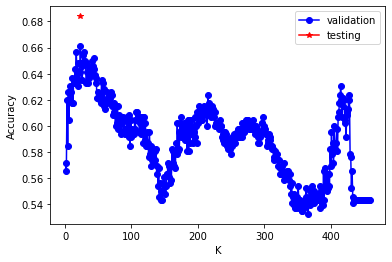

In [ ]:
x_diabetic_train_tr, x_diabetic_train_va, y_diabetic_train_tr, y_diabetic_train_va = train_test_split(x_diabetic_train, y_diabetic_train, test_size=0.5, random_state=1, shuffle=True)
model_choices=[]
valid_acc = []

n_valid = y_diabetic_train_va.shape[0]

# Test for every possible K value (so, up to total number of datapoints)
for k in range(1,x_diabetic_train_tr.shape[0]):
    knn = KNN(K=k)
    y_diabetic_train_va_prob, _ = knn.fit(x_diabetic_train_tr, y_diabetic_train_tr).predict(x_diabetic_train_va)
    y_diabetic_train_va_pred = np.argmax(y_diabetic_train_va_prob,axis=-1)
    accuracy = knn.evaluate_acc(y_diabetic_train_va, y_diabetic_train_va_pred)
    model_choices.append(k)
    valid_acc.append(accuracy)

best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_diabetic_test_prob, _ = knn.fit(x_diabetic_train, y_diabetic_train).predict(x_diabetic_test)
y_diabetic_test_pred = np.argmax(y_diabetic_test_prob, axis=-1)
accuracy = knn.evaluate_acc(y_diabetic_test, y_diabetic_test_pred)
print(f'best K = {best_valid_K}, test accuracy = {accuracy*100:.1f}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('diabetic_KNN_chooseK.png',dpi=300,bbox_inches='tight')

#### Experiment: KNN with different distance functions
Here, we use the basic KNN, with the additional modifications:

* Standardization
* Testing with different K

We will test the following distance functions:

* Euclidean
* Manhattan

##### Euclidean Distance
*Note that this is the same as `Experiment: KNN with standardization of data`, as euclidean distance is used by default.*

best K = 23, test accuracy = 68.4


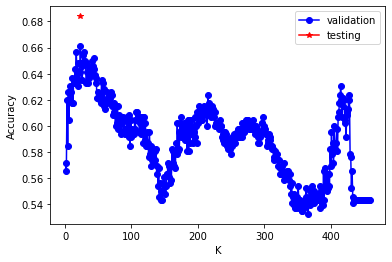

In [ ]:
# At this point, the data is already standardized.

x_diabetic_train_tr, x_diabetic_train_va, y_diabetic_train_tr, y_diabetic_train_va = train_test_split(x_diabetic_train, y_diabetic_train, test_size=0.5, random_state=1, shuffle=True)
model_choices=[]
valid_acc = []

n_valid = y_diabetic_train_va.shape[0]

# Test for every possible K value (so, up to total number of datapoints)
for k in range(1,x_diabetic_train_tr.shape[0]):
    knn = KNN(K=k, dist_fn= euclidean)
    y_diabetic_train_va_prob, _ = knn.fit(x_diabetic_train_tr, y_diabetic_train_tr).predict(x_diabetic_train_va)
    y_diabetic_train_va_pred = np.argmax(y_diabetic_train_va_prob,axis=-1)
    accuracy = knn.evaluate_acc(y_diabetic_train_va, y_diabetic_train_va_pred)
    model_choices.append(k)
    valid_acc.append(accuracy)

best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K, dist_fn= euclidean)
y_diabetic_test_prob, _ = knn.fit(x_diabetic_train, y_diabetic_train).predict(x_diabetic_test)
y_diabetic_test_pred = np.argmax(y_diabetic_test_prob, axis=-1)
accuracy = knn.evaluate_acc(y_diabetic_test, y_diabetic_test_pred)
print(f'best K = {best_valid_K}, test accuracy = {accuracy*100:.1f}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('diabetic_KNN_chooseK.png',dpi=300,bbox_inches='tight')

##### Manhattan Distance

best K = 27, test accuracy = 64.9


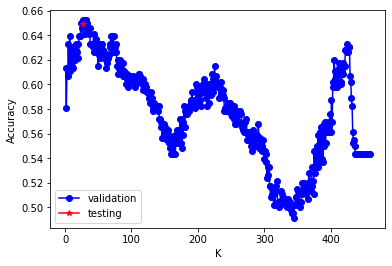

In [ ]:
# At this point, the data is already standardized.

x_diabetic_train_tr, x_diabetic_train_va, y_diabetic_train_tr, y_diabetic_train_va = train_test_split(x_diabetic_train, y_diabetic_train, test_size=0.5, random_state=1, shuffle=True)
model_choices=[]
valid_acc = []

n_valid = y_diabetic_train_va.shape[0]

# Test for every possible K value (so, up to total number of datapoints)
for k in range(1,x_diabetic_train_tr.shape[0]):
    knn = KNN(K=k, dist_fn = manhattan)
    y_diabetic_train_va_prob, _ = knn.fit(x_diabetic_train_tr, y_diabetic_train_tr).predict(x_diabetic_train_va)
    y_diabetic_train_va_pred = np.argmax(y_diabetic_train_va_prob,axis=-1)
    accuracy = knn.evaluate_acc(y_diabetic_train_va, y_diabetic_train_va_pred)
    model_choices.append(k)
    valid_acc.append(accuracy)

best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K, dist_fn = manhattan)
y_diabetic_test_prob, _ = knn.fit(x_diabetic_train, y_diabetic_train).predict(x_diabetic_test)
y_diabetic_test_pred = np.argmax(y_diabetic_test_prob, axis=-1)
accuracy = knn.evaluate_acc(y_diabetic_test, y_diabetic_test_pred)
print(f'best K = {best_valid_K}, test accuracy = {accuracy*100:.1f}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('diabetic_KNN_chooseK.png',dpi=300,bbox_inches='tight')

As we can see, the Euclidean distance provides better accuracy; therefore we will continue to use it in our experiments.

#### Experiment: Weighted KNN

Here, we use the basic KNN, with the additional modifications:

* Standardization
* Testing with different K
* Weights, using inverse Euclidean


best K = 30, test accuracy = 66.7


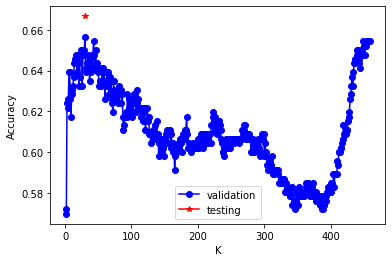

In [ ]:
x_diabetic_train_tr, x_diabetic_train_va, y_diabetic_train_tr, y_diabetic_train_va = train_test_split(x_diabetic_train, y_diabetic_train, test_size=0.5, random_state=1, shuffle=True)
model_choices=[]
valid_acc = []

n_valid = y_diabetic_train_va.shape[0]

# Test for every possible K value (so, up to total number of datapoints)
for k in range(1,x_diabetic_train_tr.shape[0]):
    knn = KNN(K=k)
    y_diabetic_train_va_pred, _ = knn.fit(x_diabetic_train_tr, y_diabetic_train_tr).weighted_predict(x_diabetic_train_va)
    accuracy = knn.evaluate_acc(y_diabetic_train_va, y_diabetic_train_va_pred)
    model_choices.append(k)
    valid_acc.append(accuracy)

best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_diabetic_test_pred, _ = knn.fit(x_diabetic_train, y_diabetic_train).weighted_predict(x_diabetic_test)
accuracy = knn.evaluate_acc(y_diabetic_test, y_diabetic_test_pred)
print(f'best K = {best_valid_K}, test accuracy = {accuracy*100:.1f}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('hepatitis_KNN_chooseK.png',dpi=300,bbox_inches='tight')

#### Experiment: High correlation features KNN

Here, we use the basic KNN, with the additional modifications:

* Standardization
* Testing with different K
* Only keeping high correlation features with the CLASS column


For diabetic retinopathy debrecen, we selected the two features with the highest correlation with the classification (see Task 1.3): `MA-1`, `MA-2`.

best K = 205, test accuracy = 54.5


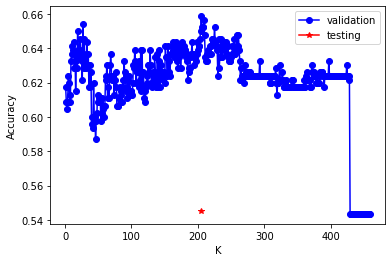

In [ ]:
# Create a modified diabetic dataset containing only features with the highest
# correlation with the `CLASS` column (MA-1, MA-2).
x_diabetic_mod = x_diabetic.loc[:,["MA-1", "MA-2"]]

# Split data between X and y
x_diabetic_train, x_diabetic_test, y_diabetic_train, y_diabetic_test = train_test_split(x_diabetic_mod, y_diabetic, test_size=0.2, random_state=1, shuffle=True)

# Convert Pandas DF to numpy -- this allow easier maths
x_diabetic_train = x_diabetic_train.to_numpy()
y_diabetic_train = y_diabetic_train.to_numpy()
x_diabetic_test = x_diabetic_test.to_numpy()
y_diabetic_test = y_diabetic_test.to_numpy()

# Standardization
for d in range(x_diabetic_train.shape[1]):
    x_diabetic_train[:,d] = (x_diabetic_train[:,d] - x_diabetic_train[:,d].mean())/x_diabetic_train[:,d].std()
    x_diabetic_test[:,d] = (x_diabetic_test[:,d] - x_diabetic_test[:,d].mean())/x_diabetic_test[:,d].std()

x_diabetic_train_tr, x_diabetic_train_va, y_diabetic_train_tr, y_diabetic_train_va = train_test_split(x_diabetic_train, y_diabetic_train, test_size=0.5, random_state=1, shuffle=True)
model_choices=[]
valid_acc = []

n_valid = y_diabetic_train_va.shape[0]

# Test for every possible K value (so, up to total number of datapoints)
for k in range(1,x_diabetic_train_tr.shape[0]):
    knn = KNN(K=k)
    y_diabetic_train_va_prob, _ = knn.fit(x_diabetic_train_tr, y_diabetic_train_tr).predict(x_diabetic_train_va)
    y_diabetic_train_va_pred = np.argmax(y_diabetic_train_va_prob,axis=-1)
    accuracy = knn.evaluate_acc(y_diabetic_train_va, y_diabetic_train_va_pred)
    model_choices.append(k)
    valid_acc.append(accuracy)

best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_diabetic_test_prob, _ = knn.fit(x_diabetic_train, y_diabetic_train).predict(x_diabetic_test)
y_diabetic_test_pred = np.argmax(y_diabetic_test_prob, axis=-1)
accuracy = knn.evaluate_acc(y_diabetic_test, y_diabetic_test_pred)
print(f'best K = {best_valid_K}, test accuracy = {accuracy*100:.1f}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, accuracy, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('diabetic_KNN_chooseK.png',dpi=300,bbox_inches='tight')

#### Decision Boundaries

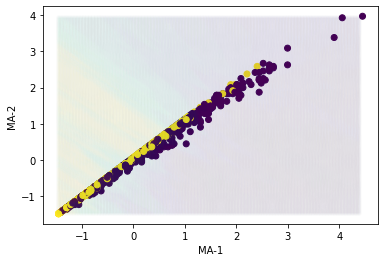

In [ ]:
# Create a modified hepatitis dataset containing only features with the highest
# correlation with the `CLASS` column (MA-1, MA-2).

x_diabetic_mod = x_diabetic.copy().loc[:,["MA-1","MA-2"]]
x_diabetic_mod = x_diabetic_mod.to_numpy()

y_diabetic_mod = y_diabetic.copy().to_numpy()

# Standardized - For plotting
# We have to standardize the total input - this is what we will use for plotting.
# We want all points to range in the graph
x_diabetic_mod_std = x_diabetic_mod.copy()
for d in range(x_diabetic_mod.shape[1]):
    x_diabetic_mod_std[:,d] = (x_diabetic_mod_std[:,d] - x_diabetic_mod_std[:,d].mean())/x_diabetic_mod_std[:,d].std()

(N,D), C = x_diabetic_mod.shape, np.max(y_diabetic_mod)+1

# Training and testing data split from this modified data set.
x_diabetic_train, x_diabetic_test, y_diabetic_train, y_diabetic_test = train_test_split(x_diabetic_mod, y_diabetic_mod, test_size=0.2, random_state=1, shuffle=True)

# # Standardization - x_train and x_test
# Here is the standardization of x_train and x_test used in testing
for d in range(x_diabetic_train.shape[1]):
    x_diabetic_train[:,d] = (x_diabetic_train[:,d] - x_diabetic_train[:,d].mean())/x_diabetic_train[:,d].std()
    x_diabetic_test[:,d] = (x_diabetic_test[:,d] - x_diabetic_test[:,d].mean())/x_diabetic_test[:,d].std()

# Decision boundaries
#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(x_diabetic_mod_std[:,0]), np.max(x_diabetic_mod_std[:,0]), 200)
x1v = np.linspace(np.min(x_diabetic_mod_std[:,1]), np.max(x_diabetic_mod_std[:,1]), 200)

# to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

for k in range(1, 40):
    model = KNN(K=k)

    y_train_prob = np.zeros((y_diabetic_train.shape[0], C))
    y_train_prob[np.arange(y_diabetic_train.shape[0]), y_diabetic_train] = 1
    
    y_prob, knns = model.fit(x_diabetic_train, y_diabetic_train).predict(x_diabetic_test)
    y_pred = np.argmax(y_prob,axis=-1)    
    correct = y_diabetic_test == y_pred
    incorrect = np.logical_not(correct)    
    
    y_pred = np.argmax(y_prob,axis=-1)
    accuracy = np.sum(y_pred == y_diabetic_test)/y_diabetic_test.shape[0]
    acc = f'accuracy: {accuracy*100:.1f}.'
    

    #to get class probability of all the points in the 2D grid
    y_prob_all, _ = model.fit(x_diabetic_train, y_diabetic_train).predict(x_all)

    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1    


plt.scatter(x_diabetic_train[:,0], x_diabetic_train[:,1], c=y_train_prob[:, 0:1], marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all[:, 0:1], marker='.', alpha=.01)
plt.ylabel('MA-2')
plt.xlabel('MA-1')
plt.show()

We can see that MA-1 and MA-2 features are very closely correlated, as they follow the same trend. However, we see a clear decision boundary: anything above the line will be classified as DIE, below will be classfied as LIVE.

## Decision Tree (DT)

### Training and Testing Data Split + Conversion to Numpy

* Here, we first split the X and y sets in Training and Testing sets.

* We will use 80% training, 20% testing, which is appropriate given the size of the datasets.

* We will also fix random_state = 1. This sets a seed and allow to reproduce the same split.

* We also convert the Pandas DataFrame to NumPy array, as our KNN and DT implementations require NumPy arrays. This can be done easily with the `to_numpy()` method.

In [ ]:
# Split data between X and y
x_hepatitis_train, x_hepatitis_test, y_hepatitis_train, y_hepatitis_test = train_test_split(x_hepatitis, y_hepatitis, test_size=0.2, random_state=1, shuffle=True)
x_diabetic_train, x_diabetic_test, y_diabetic_train, y_diabetic_test = train_test_split(x_diabetic, y_diabetic, test_size=0.2, random_state=1, shuffle=True)

# Convert Pandas DF to numpy -- this allow easier maths
x_hepatitis_train = x_hepatitis_train.to_numpy()
y_hepatitis_train = y_hepatitis_train.to_numpy()
x_hepatitis_test = x_hepatitis_test.to_numpy()
y_hepatitis_test = y_hepatitis_test.to_numpy()

x_diabetic_train = x_diabetic_train.to_numpy()
y_diabetic_train = y_diabetic_train.to_numpy()
x_diabetic_test = x_diabetic_test.to_numpy()
y_diabetic_test = y_diabetic_test.to_numpy()

### Hepatitis

#### DT Results: Basic version

Here, we use the basic DT on the **hepatitis** dataset, with no additional modifications/experiments.

In [ ]:
tree = DecisionTree(max_depth=20)
probs_test = tree.fit(x_hepatitis_train, y_hepatitis_train).predict(x_hepatitis_test)
y_pred = np.argmax(probs_test,1)
accuracy = tree.evaluate_acc(y_hepatitis_test, y_pred)
print(f'accuracy is {accuracy*100:.1f}.')

accuracy is 75.0.


**Observations**

We notice that we have both continuous and discrete (binary) data.
  - One-hot encoding is not necessary for categorical features, since they are already binary. Therefore, their value (0 or 1) make sense.
  - However, we will experiment standardization of the data, for two reason:
      1. This will make the discrete data comparable with the continuous data.
      2. There is a large gap between the values of different features.
It will be interesting to see whether or not standardization will have an impact on the Decision Tree.

#### Experiment: Standardized DT
Here, we use the basic DT, with the additional modifications:

*   Standardization


In [ ]:
for d in range(x_hepatitis_train.shape[1]):
    x_hepatitis_train[:,d] = (x_hepatitis_train[:,d] - x_hepatitis_train[:,d].mean())/x_hepatitis_train[:,d].std()
    x_hepatitis_test[:,d] = (x_hepatitis_test[:,d] - x_hepatitis_test[:,d].mean())/x_hepatitis_test[:,d].std()

In [ ]:
tree = DecisionTree(max_depth=20)
probs_test = tree.fit(x_hepatitis_train, y_hepatitis_train).predict(x_hepatitis_test)
y_pred = np.argmax(probs_test,1)
accuracy = tree.evaluate_acc(y_hepatitis_test, y_pred)
print(f'accuracy is {accuracy*100:.1f}.')

accuracy is 87.5.


#### DT Different Cost Functions

##### Misclassification

The disadvantage is that it doesn't take into account predictions uncertainty.

In [ ]:
# Misclassification Rate Cost
tree = DecisionTree(max_depth=20, cost_fn = cost_misclassification)
probs_test = tree.fit(x_hepatitis_train, y_hepatitis_train).predict(x_hepatitis_test)
y_pred = np.argmax(probs_test,1)
accuracy = tree.evaluate_acc(y_hepatitis_test, y_pred)
print(f'Accuracy with \"Misclassification rate cost function" is {accuracy*100:.1f}.')

Accuracy with "Misclassification rate cost function" is 81.2.


##### Entropy

In [ ]:
# Entropy Cost
tree = DecisionTree(max_depth=20, cost_fn = cost_entropy)
probs_test = tree.fit(x_hepatitis_train, y_hepatitis_train).predict(x_hepatitis_test)
y_pred = np.argmax(probs_test,1)
accuracy = tree.evaluate_acc(y_hepatitis_test, y_pred)
print(f'Accuracy with \"Entropy cost function\" is {accuracy*100:.1f}.')

Accuracy with "Entropy cost function" is 87.5.


##### Gini Index

In [ ]:
# Gini Index Cost
tree = DecisionTree(max_depth=20, cost_fn = cost_gini_index)
probs_test = tree.fit(x_hepatitis_train, y_hepatitis_train).predict(x_hepatitis_test)
y_pred = np.argmax(probs_test,1)
accuracy = tree.evaluate_acc(y_hepatitis_test, y_pred)
print(f'Accuracy with \"Gini index cost function\" {accuracy*100:.1f}.')

Accuracy with "Gini index cost function" 87.5.


**Conclusion**:
Let's continue with the Gini index. 
  * Misclassification cost doesn't take into account prediction uncertainties
  * Gini index is the default, over entropy, so let's use it.

#### Experiment: DT with Different Maximum Depth
Here, we use the basic DT, with the additional modifications:

*   Standardization
*   Testing with different maximum depth

In [ ]:
# further split the training data into 50% training and 50% validation

x_hepatitis_train_tr, x_hepatitis_train_va, y_hepatitis_train_tr, y_hepatitis_train_va = train_test_split(x_hepatitis_train, y_hepatitis_train, test_size=0.5, random_state=1, shuffle=True)

best depth = 1, test accuracy = 81.2


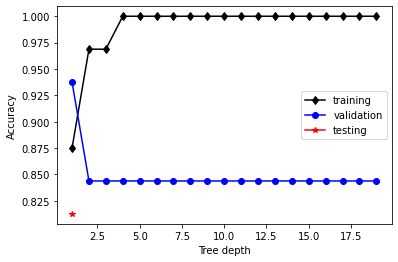

In [ ]:
# Testing data

model_choices=[]
train_acc = []
valid_acc = []

n_train = y_hepatitis_train_tr.shape[0]
n_valid = y_hepatitis_train_va.shape[0]

for k in range(1,20):
    dt = DecisionTree(max_depth=k) # create a Decision Tree object (OOP)

    y_hepatitis_train_tr_prob = dt.fit(x_hepatitis_train_tr, y_hepatitis_train_tr).predict(x_hepatitis_train_tr)
    y_hepatitis_train_tr_pred = np.argmax(y_hepatitis_train_tr_prob, axis=-1)
    acc_tr = dt.evaluate_acc(y_hepatitis_train_tr, y_hepatitis_train_tr_pred)

    y_train_va_prob = dt.fit(x_hepatitis_train_tr, y_hepatitis_train_tr).predict(x_hepatitis_train_va)
    y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
    acc_va = dt.evaluate_acc(y_hepatitis_train_va, y_train_va_pred)

    model_choices.append(k)
    train_acc.append(acc_tr)
    valid_acc.append(acc_va)

# use the best K to predict test data
best_depth = model_choices[valid_acc.index(max(valid_acc))]
dt = DecisionTree(max_depth=best_depth)
y_hepatitis_test_prob = dt.fit(x_hepatitis_train, y_hepatitis_train).predict(x_hepatitis_test)
y_hepatitis_test_pred = np.argmax(y_hepatitis_test_prob, axis=-1)
test_accuracy = dt.evaluate_acc(y_hepatitis_test, y_hepatitis_test_pred)
print(f'best depth = {best_depth}, test accuracy = {test_accuracy*100:.1f}')

plt.plot(model_choices, train_acc, marker='d', color='black', label='training')
plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_depth, test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('hepatitis_DT_chooseDepth.png',dpi=300,bbox_inches='tight')

#### Experiment: High Correlation Features DT
Here, we use the basic DT, with the additional modifications:

*   Standardization
*   Testing with different maximum depth
*   Only keeping high correlation features with the `CLASS` column


**Explanations**:

In task 1.3, we noticed that some features had a much larger correlation with the label column `CLASS`. More specifically, two features have a absolute correlation greater than `0.4`:
  * ASCITES: 0.479
  * ALBUMIN: 0.477

Therefore, we experimented running our decision tree algorithm on a modified data set that contains only those two features.

best depth = 1, test accuracy = 87.5


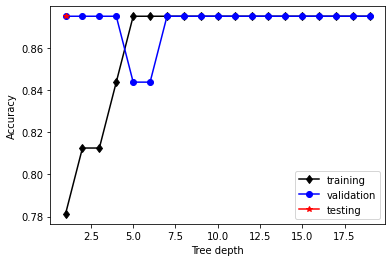

In [ ]:
# Create a modified hepatitis dataset containing only features with the highest
# correlation with the `CLASS` column (ASCITES, ALBUMIN).
x_hepatitis_mod = x_hepatitis.loc[:,["ASCITES","ALBUMIN"]]

# Training and testing data split from this modified data set.
x_hepatitis_train, x_hepatitis_test, y_hepatitis_train, y_hepatitis_test = train_test_split(x_hepatitis_mod, y_hepatitis, test_size=0.2, random_state=1, shuffle=True)

# Convert Pandas DF to numpy -- this allow easier maths
x_hepatitis_train = x_hepatitis_train.to_numpy()
y_hepatitis_train = y_hepatitis_train.to_numpy()
x_hepatitis_test = x_hepatitis_test.to_numpy()
y_hepatitis_test = y_hepatitis_test.to_numpy()

# Standardizing features
for i in range(x_hepatitis_train.shape[1]):
    x_hepatitis_train[:,i] = (x_hepatitis_train[:,i] - np.mean(x_hepatitis_train[:,i]))/np.std(x_hepatitis_train[:,i])
    x_hepatitis_test[:,i] = (x_hepatitis_test[:,i] - np.mean(x_hepatitis_test[:,i]))/np.std(x_hepatitis_test[:,i])

# Further split the training data into 50% training and 50% validation
x_hepatitis_train_tr, x_hepatitis_train_va, y_hepatitis_train_tr, y_hepatitis_train_va = train_test_split(x_hepatitis_train, y_hepatitis_train, test_size=0.5, random_state=1, shuffle=True)


# Testing data

model_choices=[]
train_acc = []
valid_acc = []

n_train = y_hepatitis_train_tr.shape[0]
n_valid = y_hepatitis_train_va.shape[0]

for k in range(1,20):
    dt = DecisionTree(max_depth=k) # create a Decision Tree object (OOP)

    y_hepatitis_train_tr_prob = dt.fit(x_hepatitis_train_tr, y_hepatitis_train_tr).predict(x_hepatitis_train_tr)
    y_hepatitis_train_tr_pred = np.argmax(y_hepatitis_train_tr_prob, axis=-1)
    acc_tr = dt.evaluate_acc(y_hepatitis_train_tr, y_hepatitis_train_tr_pred)

    y_train_va_prob = dt.fit(x_hepatitis_train_tr, y_hepatitis_train_tr).predict(x_hepatitis_train_va)
    y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
    acc_va = dt.evaluate_acc(y_hepatitis_train_va, y_train_va_pred)

    model_choices.append(k)
    train_acc.append(acc_tr)
    valid_acc.append(acc_va)

# use the best K to predict test data
best_depth = model_choices[valid_acc.index(max(valid_acc))]
dt = DecisionTree(max_depth=best_depth)
y_hepatitis_test_prob = dt.fit(x_hepatitis_train, y_hepatitis_train).predict(x_hepatitis_test)
y_hepatitis_test_pred = np.argmax(y_hepatitis_test_prob, axis=-1)
test_accuracy = dt.evaluate_acc(y_hepatitis_test, y_hepatitis_test_pred)
print(f'best depth = {best_depth}, test accuracy = {test_accuracy*100:.1f}')

plt.plot(model_choices, train_acc, marker='d', color='black', label='training')
plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_depth, test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('hepatitis_DT_best_features_only.png',dpi=300,bbox_inches='tight')

#### Decision Boundaries

Here, we will compute the descision boundaries using the two continuous features with the highest correlation with the CLASS column. We look at PROTIME instead of ASCITES, since PROTIME is continuous, which will make more sense to plot, and it has a correlation with CLASS similar to ASCITES (only slightly smaller).

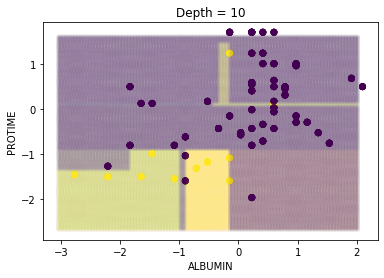

In [ ]:
# For the 2 biggest CONTINUOUS features: ALBUMIN and PROTIME

# Create a modified hepatitis dataset containing only features with the highest
# correlation with the `CLASS` column (PROTIME, ALBUMIN).

x_hepatitis_mod = x_hepatitis.copy().loc[:,["ALBUMIN","PROTIME"]]
x_hepatitis_mod = x_hepatitis_mod.to_numpy()

y_hepatitis_mod = y_hepatitis.copy().to_numpy()

# Standardized - For plotting
# We have to standardize the total input - this is what we will use for plotting.
# We want all points to range in the graph
x_hepatitis_mod_std = x_hepatitis_mod.copy()
for d in range(x_hepatitis_mod.shape[1]):
    x_hepatitis_mod_std[:,d] = (x_hepatitis_mod_std[:,d] - x_hepatitis_mod_std[:,d].mean())/x_hepatitis_mod_std[:,d].std()

(N,D), C = x_hepatitis_mod.shape, np.max(y_hepatitis_mod)+1

# Training and testing data split from this modified data set.
x_hepatitis_train, x_hepatitis_test, y_hepatitis_train, y_hepatitis_test = train_test_split(x_hepatitis_mod, y_hepatitis_mod, test_size=0.2, random_state=1, shuffle=True)

# # Standardization - x_train and x_test
# Here is the standardization of x_train and x_test used in testing
for d in range(x_hepatitis_train.shape[1]):
    x_hepatitis_train[:,d] = (x_hepatitis_train[:,d] - x_hepatitis_train[:,d].mean())/x_hepatitis_train[:,d].std()
    x_hepatitis_test[:,d] = (x_hepatitis_test[:,d] - x_hepatitis_test[:,d].mean())/x_hepatitis_test[:,d].std()

# Decision boundaries
#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(x_hepatitis_mod_std[:,0]), np.max(x_hepatitis_mod_std[:,0]), 200)
x1v = np.linspace(np.min(x_hepatitis_mod_std[:,1]), np.max(x_hepatitis_mod_std[:,1]), 200)

# to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

for tree_depth in [1,3,7,10]:
    model = DecisionTree(max_depth=tree_depth)
    y_train_prob = np.zeros((y_hepatitis_train.shape[0], 2))
    y_train_prob[np.arange(y_hepatitis_train.shape[0]), y_hepatitis_train] = 1
    y_prob_all = model.fit(x_hepatitis_train, y_hepatitis_train).predict(x_all)
    plt.scatter(x_hepatitis_train[:,0], x_hepatitis_train[:,1], c=y_train_prob[:, 0:1], marker='o', alpha=1)
    plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all[:, 0:1], marker='.', alpha=.01)
    plt.ylabel('PROTIME')
    plt.xlabel('ALBUMIN')
    plt.title('Depth = ' + str(tree_depth))
    plt.savefig('hepatitis_tree_depth' + str(tree_depth) + '.png', bbox_inches="tight", dpi=300)

### Diabetic Retinopathy Debrecen

#### DT Results: Basic version

Here, we use the basic DT on the **diabetic retinopathy debrecen** dataset, with no additional modifications/experiments.

In [ ]:
tree = DecisionTree(max_depth=10)
probs_test = tree.fit(x_diabetic_train, y_diabetic_train).predict(x_diabetic_test)
y_pred = np.argmax(probs_test,1)
accuracy = tree.evaluate_acc(y_diabetic_test, y_pred)
print(f'accuracy is {accuracy*100:.1f}.')

accuracy is 56.3.


#### Experiment: DT with Standardized features

In [ ]:
for d in range(x_diabetic_train.shape[1]):
    x_diabetic_train[:,d] = (x_diabetic_train[:,d] - x_diabetic_train[:,d].mean())/x_diabetic_train[:,d].std()
    x_diabetic_test[:,d] = (x_diabetic_test[:,d] - x_diabetic_test[:,d].mean())/x_diabetic_test[:,d].std()

In [ ]:
tree = DecisionTree(max_depth=20)
probs_test = tree.fit(x_diabetic_train, y_diabetic_train).predict(x_diabetic_test)
y_pred = np.argmax(probs_test,1)
accuracy = tree.evaluate_acc(y_diabetic_test, y_pred)
print(f'accuracy is {accuracy*100:.1f}.')

accuracy is 57.6.


#### DT Different Cost Functions

##### Misclassification

The disadvantage is that it doesn't take into account predictions uncertainty.

In [ ]:
# Misclassification Rate Cost
tree = DecisionTree(max_depth=20, cost_fn = cost_misclassification)
probs_test = tree.fit(x_diabetic_train, y_diabetic_train).predict(x_diabetic_test)
y_pred = np.argmax(probs_test,1)
accuracy = tree.evaluate_acc(y_diabetic_test, y_pred)
print(f'accuracy is {accuracy*100:.1f}.')

accuracy is 60.2.


##### Entropy

In [ ]:
# Entropy Cost
tree = DecisionTree(max_depth=20, cost_fn = cost_entropy)
probs_test = tree.fit(x_diabetic_train, y_diabetic_train).predict(x_diabetic_test)
y_pred = np.argmax(probs_test,1)
accuracy = tree.evaluate_acc(y_diabetic_test, y_pred)
print(f'accuracy is {accuracy*100:.1f}.')

accuracy is 60.2.


##### Gini Index

In [ ]:
# Gini Index Cost
tree = DecisionTree(max_depth=20, cost_fn = cost_gini_index)
probs_test = tree.fit(x_diabetic_train, y_diabetic_train).predict(x_diabetic_test)
y_pred = np.argmax(probs_test,1)
accuracy = tree.evaluate_acc(y_diabetic_test, y_pred)
print(f'accuracy is {accuracy*100:.1f}.')

accuracy is 57.6.


**Conclusion**:
For the Diabetic dataset, let's continue with the entropy, as it has a greater accuracy than Gini Index. We won't take the misclassification cost, as doesn't take into account prediction uncertainties.

#### Experiment: DT with Different Maximum Depth

Here, we use the basic DT, with the additional modifications:

*   Standardization
*   Testing with different maximum depth

In [ ]:
# further split the training data into 50% training and 50% validation

x_diabetic_train_tr, x_diabetic_train_va, y_diabetic_train_tr, y_diabetic_train_va = train_test_split(x_diabetic_train, y_diabetic_train, test_size=0.5, random_state=1, shuffle=True)

best depth = 10, test accuracy = 62.8


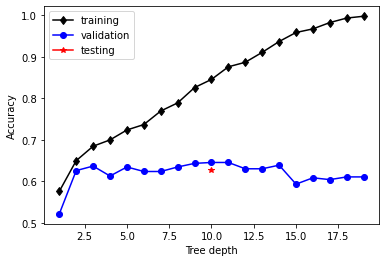

In [ ]:
# Testing data

model_choices=[]
train_acc = []
valid_acc = []

n_train = y_diabetic_train_tr.shape[0]
n_valid = y_diabetic_train_va.shape[0]

for k in range(1,20):
    dt = DecisionTree(max_depth=k, cost_fn = cost_entropy) # create a Decision Tree object (OOP)

    y_diabetic_train_tr_prob = dt.fit(x_diabetic_train_tr, y_diabetic_train_tr).predict(x_diabetic_train_tr)
    y_diabetic_train_tr_pred = np.argmax(y_diabetic_train_tr_prob, axis=-1)
    acc_tr = dt. evaluate_acc(y_diabetic_train_tr, y_diabetic_train_tr_pred)

    y_train_va_prob = dt.fit(x_diabetic_train_tr, y_diabetic_train_tr).predict(x_diabetic_train_va)
    y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
    acc_va = dt.evaluate_acc(y_diabetic_train_va, y_train_va_pred)

    model_choices.append(k)
    train_acc.append(acc_tr)
    valid_acc.append(acc_va)

# use the best K to predict test data
best_depth = model_choices[valid_acc.index(max(valid_acc))]
dt = DecisionTree(max_depth=best_depth, cost_fn = cost_entropy)
y_diabetic_test_prob = dt.fit(x_diabetic_train, y_diabetic_train).predict(x_diabetic_test)
y_diabetic_test_pred = np.argmax(y_diabetic_test_prob, axis=-1)
test_accuracy = dt.evaluate_acc(y_diabetic_test, y_diabetic_test_pred)
print(f'best depth = {best_depth}, test accuracy = {test_accuracy*100:.1f}')

plt.plot(model_choices, train_acc, marker='d', color='black', label='training')
plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_depth, test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('diabetic_DT_chooseDepth.png',dpi=300,bbox_inches='tight')

#### Experiment: High Correlation Features DT
Here, we use the basic DT, with the additional modifications:

*   Standardization
*   Testing with different maximum depth
*   Only keeping high correlation features with the `CLASS` column


For diabetic retinopathy debrecen, there are no features with a correlation greater than 0.4 (see Task 1.3). Therefore, to run this experiment, we selected features with a correlation greater than 0.2: `MA-1`, `MA-2`, `MA-3`.

best depth = 14, test accuracy = 64.5


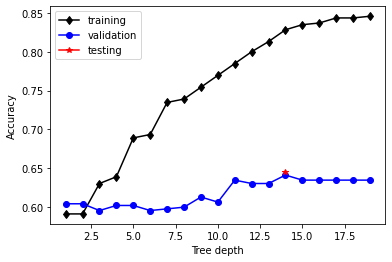

In [ ]:
# Create a modified diabetic dataset containing only features with the highest
# correlation with the `CLASS` column (MA-1, MA-2, MA-3).
x_diabetic_mod = x_diabetic.loc[:,["MA-1", "MA-2"]]

# Split data between X and y
x_diabetic_train, x_diabetic_test, y_diabetic_train, y_diabetic_test = train_test_split(x_diabetic_mod, y_diabetic, test_size=0.2, random_state=1, shuffle=True)

# Convert Pandas DF to numpy -- this allow easier maths
x_diabetic_train = x_diabetic_train.to_numpy()
y_diabetic_train = y_diabetic_train.to_numpy()
x_diabetic_test = x_diabetic_test.to_numpy()
y_diabetic_test = y_diabetic_test.to_numpy()

# Standardizing features
for i in range(x_diabetic_train.shape[1]):
    x_diabetic_train[:,i] = (x_diabetic_train[:,i] - np.mean(x_diabetic_train[:,i]))/np.std(x_diabetic_train[:,i])
    x_diabetic_test[:,i] = (x_diabetic_test[:,i] - np.mean(x_diabetic_test[:,i]))/np.std(x_diabetic_test[:,i])

# Further split the training data into 50% training and 50% validation
x_diabetic_train_tr, x_diabetic_train_va, y_diabetic_train_tr, y_diabetic_train_va = train_test_split(x_diabetic_train, y_diabetic_train, test_size=0.5, random_state=1, shuffle=True)

# Testing data
model_choices=[]
train_acc = []
valid_acc = []

n_train = y_diabetic_train_tr.shape[0]
n_valid = y_diabetic_train_va.shape[0]

for k in range(1,20):
    dt = DecisionTree(max_depth=k) # create a Decision Tree object (OOP)

    y_diabetic_train_tr_prob = dt.fit(x_diabetic_train_tr, y_diabetic_train_tr).predict(x_diabetic_train_tr)
    y_diabetic_train_tr_pred = np.argmax(y_diabetic_train_tr_prob, axis=-1)
    acc_tr = dt. evaluate_acc(y_diabetic_train_tr, y_diabetic_train_tr_pred)

    y_train_va_prob = dt.fit(x_diabetic_train_tr, y_diabetic_train_tr).predict(x_diabetic_train_va)
    y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
    acc_va = dt.evaluate_acc(y_diabetic_train_va, y_train_va_pred)

    model_choices.append(k)
    train_acc.append(acc_tr)
    valid_acc.append(acc_va)

# use the best K to predict test data
best_depth = model_choices[valid_acc.index(max(valid_acc))]
dt = DecisionTree(max_depth=best_depth, cost_fn = cost_entropy)
y_diabetic_test_prob = dt.fit(x_diabetic_train, y_diabetic_train).predict(x_diabetic_test)
y_diabetic_test_pred = np.argmax(y_diabetic_test_prob, axis=-1)
test_accuracy = dt.evaluate_acc(y_diabetic_test, y_diabetic_test_pred)
print(f'best depth = {best_depth}, test accuracy = {test_accuracy*100:.1f}')

plt.plot(model_choices, train_acc, marker='d', color='black', label='training')
plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(best_depth, test_accuracy, marker='*', color='red', label='testing')
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('diabetic_DT_chooseDepth.png',dpi=300,bbox_inches='tight')

#### Decision Boundaries

For the decision boundaries, we are using the two highest correlation features with the CLASS column: MA-1 and MA-2. They are both continuous data, thus it make sense to plot them together.

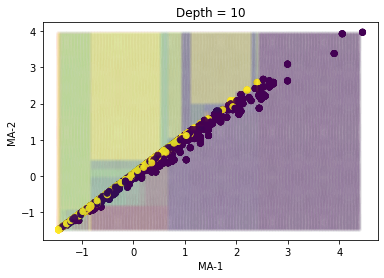

In [ ]:
# For the 2 biggest CONTINUOUS features: MA-1 and MA-2

# Create a modified diabetic dataset containing only features with the highest
# correlation with the `CLASS` column (MA-1, MA-2).

x_diabetic_mod = x_diabetic.copy().loc[:,["MA-1","MA-2"]]
x_diabetic_mod = x_diabetic_mod.to_numpy()

y_diabetic_mod = y_diabetic.copy().to_numpy()

# Standardized - For plotting
# We have to standardize the total input - this is what we will use for plotting.
# We want all points to range in the graph
x_diabetic_mod_std = x_diabetic_mod.copy()
for d in range(x_diabetic_mod.shape[1]):
    x_diabetic_mod_std[:,d] = (x_diabetic_mod_std[:,d] - x_diabetic_mod_std[:,d].mean())/x_diabetic_mod_std[:,d].std()

(N,D), C = x_diabetic_mod.shape, np.max(y_diabetic_mod)+1

# Training and testing data split from this modified data set.
x_diabetic_train, x_diabetic_test, y_diabetic_train, y_diabetic_test = train_test_split(x_diabetic_mod, y_diabetic_mod, test_size=0.2, random_state=1, shuffle=True)

# # Standardization - x_train and x_test
# Here is the standardization of x_train and x_test used in testing
for d in range(x_diabetic_train.shape[1]):
    x_diabetic_train[:,d] = (x_diabetic_train[:,d] - x_diabetic_train[:,d].mean())/x_diabetic_train[:,d].std()
    x_diabetic_test[:,d] = (x_diabetic_test[:,d] - x_diabetic_test[:,d].mean())/x_diabetic_test[:,d].std()

# Decision boundaries
#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(x_diabetic_mod_std[:,0]), np.max(x_diabetic_mod_std[:,0]), 200)
x1v = np.linspace(np.min(x_diabetic_mod_std[:,1]), np.max(x_diabetic_mod_std[:,1]), 200)

# to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

for tree_depth in [1,3,7,10]:
    model = DecisionTree(max_depth=tree_depth)
    y_train_prob = np.zeros((y_diabetic_train.shape[0], 2))
    y_train_prob[np.arange(y_diabetic_train.shape[0]), y_diabetic_train] = 1
    y_prob_all = model.fit(x_diabetic_train, y_diabetic_train).predict(x_all)
    plt.scatter(x_diabetic_train[:,0], x_diabetic_train[:,1], c=y_train_prob[:, 0:1], marker='o', alpha=1)
    plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all[:, 0:1], marker='.', alpha=.01)
    plt.ylabel('MA-2')
    plt.xlabel('MA-1')
    plt.title('Depth = ' + str(tree_depth))
    plt.savefig('diabetic_tree_depth' + str(tree_depth) + '.png', bbox_inches="tight", dpi=300)

# ROC Curves
Our analysis shows that KNN accuracy outperforms DT on the two datasets. To support this, we will plot the ROC curves.

Our results below show a greater AUROC for KNN than DT, which supports our conclusions that KNN outperforms DT.

In [ ]:
# Split data between X and y
x_hepatitis_train, x_hepatitis_test, y_hepatitis_train, y_hepatitis_test = train_test_split(x_hepatitis, y_hepatitis, test_size=0.2, random_state=1, shuffle=True)
x_diabetic_train, x_diabetic_test, y_diabetic_train, y_diabetic_test = train_test_split(x_diabetic, y_diabetic, test_size=0.2, random_state=1, shuffle=True)

# Convert Pandas DF to numpy -- this allow easier maths
x_hepatitis_train = x_hepatitis_train.to_numpy()
y_hepatitis_train = y_hepatitis_train.to_numpy()
x_hepatitis_test = x_hepatitis_test.to_numpy()
y_hepatitis_test = y_hepatitis_test.to_numpy()

x_diabetic_train = x_diabetic_train.to_numpy()
y_diabetic_train = y_diabetic_train.to_numpy()
x_diabetic_test = x_diabetic_test.to_numpy()
y_diabetic_test = y_diabetic_test.to_numpy()

In [ ]:
# Standardization
for d in range(x_hepatitis_train.shape[1]):
    x_hepatitis_train[:,d] = (x_hepatitis_train[:,d] - x_hepatitis_train[:,d].mean())/x_hepatitis_train[:,d].std()
    x_hepatitis_test[:,d] = (x_hepatitis_test[:,d] - x_hepatitis_test[:,d].mean())/x_hepatitis_test[:,d].std()

## Hepatitis

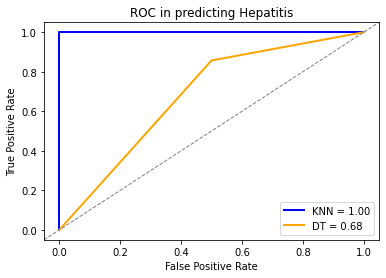

In [ ]:
# Plotting KNN AUROC
knn = KNN(K=3) # create a KNN object (OOP) (K=3 is the K yielding the best accuracy, as found in previous experiments)
y_test_prob, _ = knn.fit(x_hepatitis_train, y_hepatitis_train).predict(x_hepatitis_test)
y_test_prob = y_test_prob[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_hepatitis_test, y_test_prob)
roc_auc_knn = roc_auc_score(y_hepatitis_test, y_test_prob)


# Plotting Decision Tree AUROC
dt = DecisionTree(max_depth=1) # K=10 (Best Max Depth yielding the best accuracy)
y_test_prob = dt.fit(x_hepatitis_train, y_hepatitis_train).predict(x_hepatitis_test)
y_test_prob = y_test_prob[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_hepatitis_test, y_test_prob)
roc_auc_dt = roc_auc_score(y_hepatitis_test, y_test_prob)

plt.clf()
plt.plot(fpr_knn, tpr_knn, "b-", lw=2, label="KNN = %0.2f"%roc_auc_knn)
plt.plot(fpr_dt, tpr_dt, color="orange", lw=2, label="DT = %0.2f"%roc_auc_dt)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC in predicting Hepatitis')
plt.legend(loc="best")
plt.savefig("hepatitis_roc_curve.png",bbox_inches='tight', dpi=300)

## Diabetic

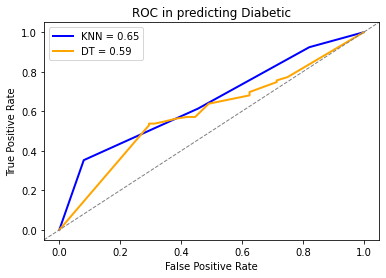

In [ ]:
# Plotting KNN AUROC
knn = KNN(K=3) # create a KNN object (OOP) (K=3 is the K yielding the best accuracy, as found in previous experiments)
y_test_prob, _ = knn.fit(x_diabetic_train, y_diabetic_train).predict(x_diabetic_test)
y_test_prob = y_test_prob[:, 1]
fpr_knn, tpr_knn, thresholds = roc_curve(y_diabetic_test, y_test_prob)
roc_auc_knn = roc_auc_score(y_diabetic_test, y_test_prob)

# Plotting Decision Tree AUROC
dt = DecisionTree(max_depth=10) # K=10 (Best Max Depth yielding the best accuracy)
y_test_prob = dt.fit(x_diabetic_train, y_diabetic_train).predict(x_diabetic_test)
y_test_prob = y_test_prob[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_diabetic_test, y_test_prob)
roc_auc_dt = roc_auc_score(y_diabetic_test, y_test_prob)

plt.clf()
plt.plot(fpr_knn, tpr_knn, "b-", lw=2, label="KNN = %0.2f"%roc_auc_knn)
plt.plot(fpr_dt, tpr_dt, color='orange', lw=2, label="DT = %0.2f"%roc_auc_dt)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC in predicting Diabetic')
plt.legend(loc="best")
plt.savefig("diabetic_roc_curve.png",bbox_inches='tight', dpi=300)